## EDA for King County Housing

### The client is Larry Sanders.

- Waterfront
- Limited budget
- Nice & Isolated 
- But central neighborhood 
- Without kids (but got some of his own, just doesn't want his kids to play with other kids .. because of germs)

## Questions

1. Are there Waterfront Properties that fit a limited budget?
    - Does a limited budget exclude outliers and whiskers?
2. What influences the price most? View or Waterfront?
    - If the waterfront house is closer to the city center, is the price higher?
3. Are there isolated properties in central neighborhoods?
    - Is a smaller waterfront house with big lot size cheaper than a big waterfront house with smaller lot?
4. If your neighbours had big properties would you consider the area closer to the city and not so isolated?
5. What are the best areas to buy in the city with the biggest lot sizes?

### Some Information

Your client wants to get a good understanding of the general housing condition in Seattle and surroundings and furthermore to have some recommendations tailored to their needs.


In [544]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import plotly.express as px
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from haversine import haversine, Unit
from matplotlib.ticker import PercentFormatter

plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [545]:
df = pd.read_csv('./data/eda.csv')

#converting to proper datetime format
df.date = pd.to_datetime(df.date)
df = df.rename({'id.1': 'sale_id'}, axis=1)
df.columns


Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'sale_id'],
      dtype='object')

In [546]:
df.shape

(21597, 23)

In [547]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,sale_id
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


<Axes: >

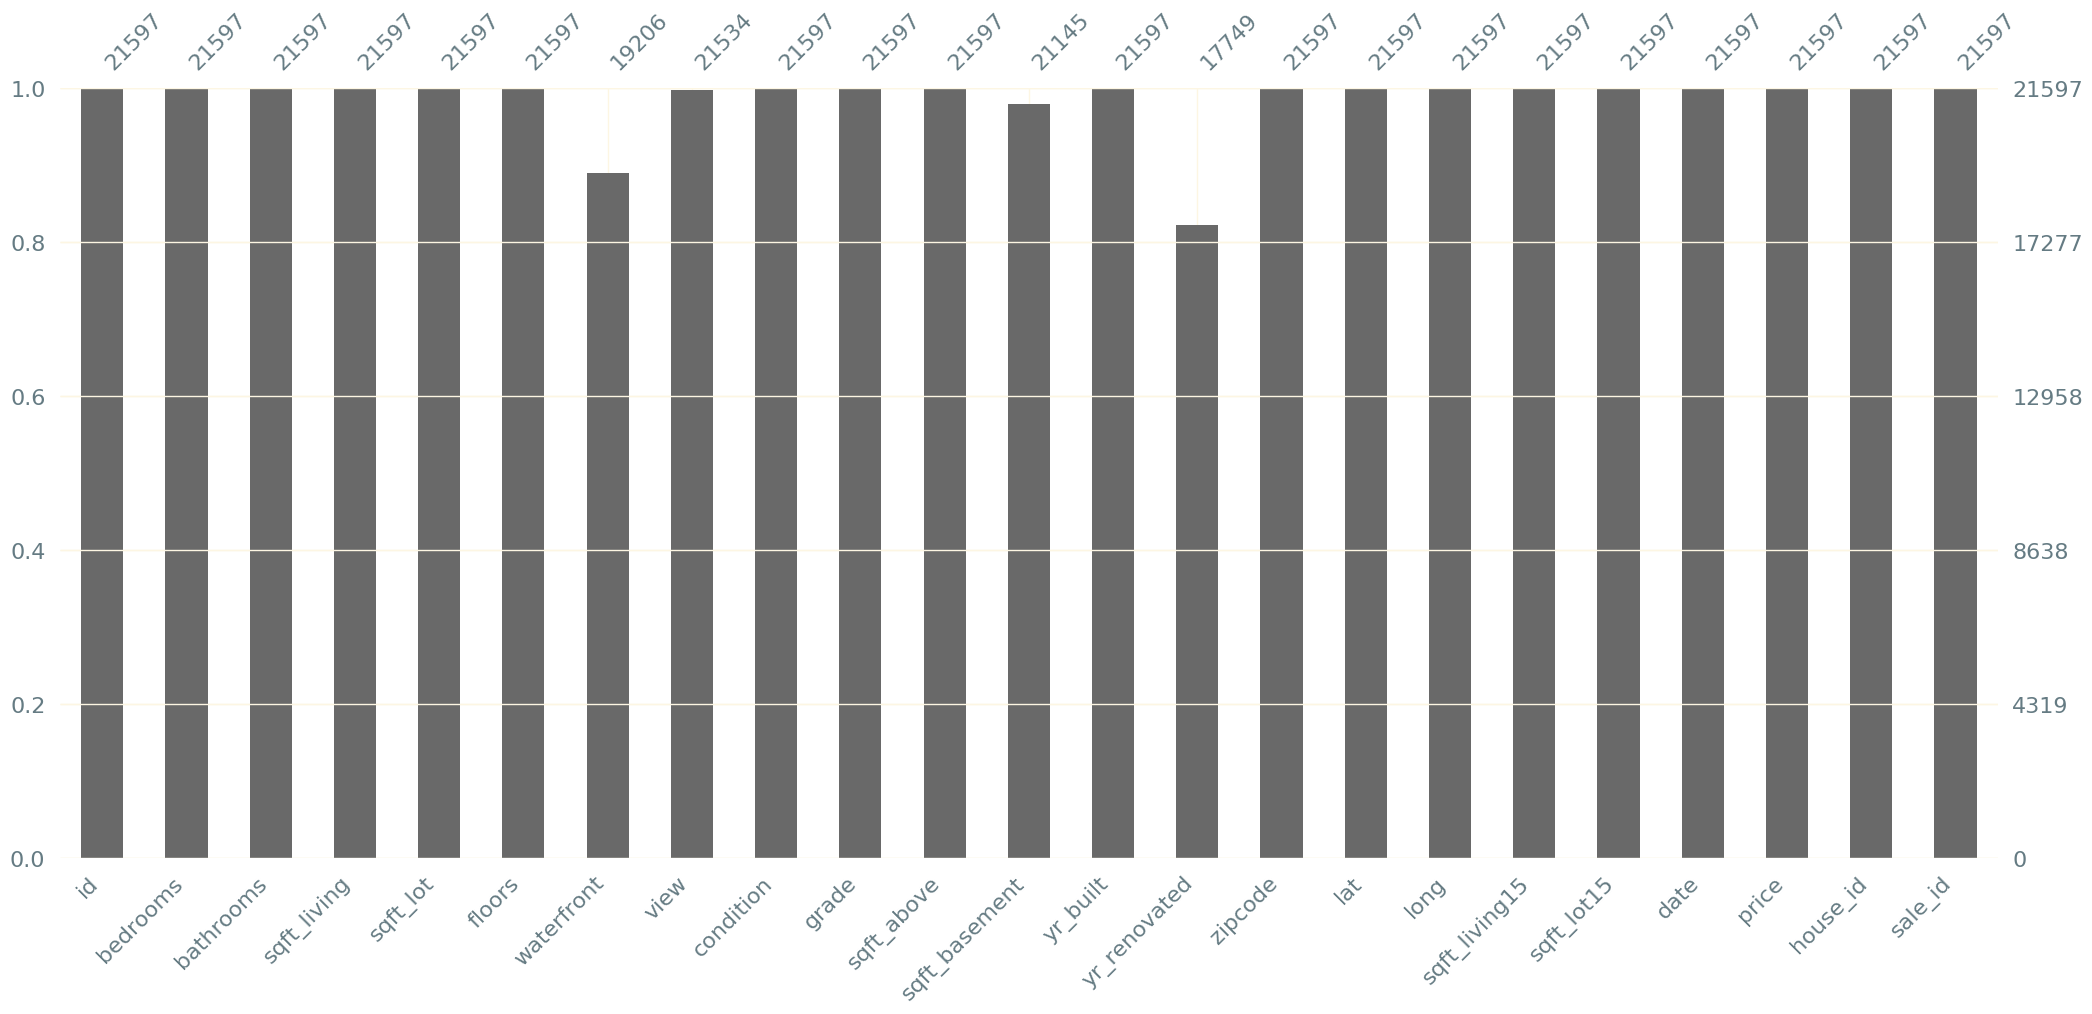

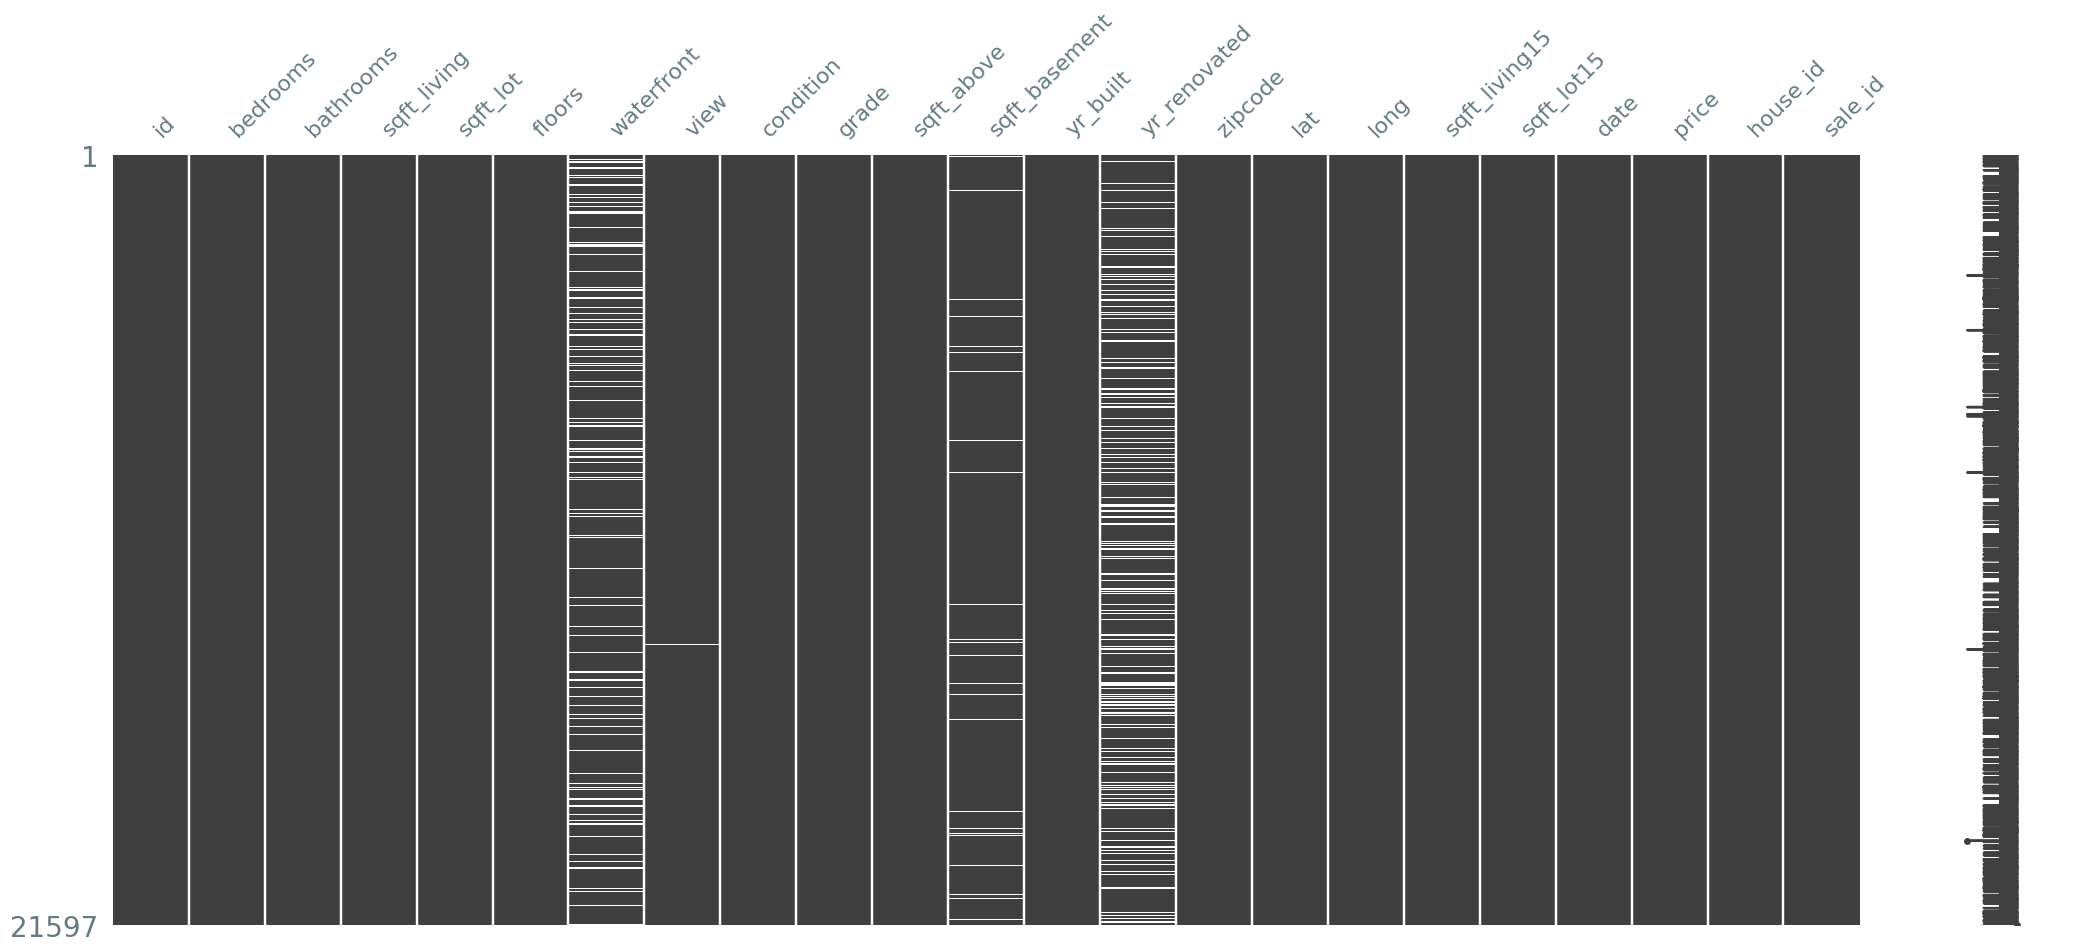

In [548]:
msno.bar(df)
msno.matrix(df)

In [549]:
# examining whether there are random values
df.waterfront.unique()

array([nan,  0.,  1.])

In [550]:
df.duplicated().value_counts()
# we don't have any duplicates

False    21597
Name: count, dtype: int64

In [551]:
# save these real estate properties for later
df_waterfront_unknown= df[df['waterfront'].isna() == True]
df_on_waterfront = df[df['waterfront'] == 1]

In [552]:

title = "Waterfront Properties in King County Close to City Centers"

lats = df_on_waterfront.lat
lons = df_on_waterfront.long

fig = px.scatter_mapbox(df_on_waterfront, 
                        lat=lats, 
                        lon=lons,
                        hover_data=["price"], 
                        size='price',
                        color='price',
                        color_continuous_scale=px.colors.carto.Sunsetdark,
                        zoom=9.5
                        )

fig.update_geos(fitbounds="locations")
fig.update_layout(height=1000, width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50})

fig.show()

### Calculate the distance from City Centers of Seattle and Bellevue

In [553]:


CONST_SEATTLE_CENTER = 47.608013, -122.335167
CONST_BELLEVUE_CENTER = 47.610378, -122.200676


df_on_waterfront['distance_seattle_center'] = [haversine((row.lat, row.long), CONST_SEATTLE_CENTER, Unit.MILES) for _, row in df_on_waterfront[['lat', 'long']].iterrows()]
df_on_waterfront['distance_bellevue_center'] = [haversine((row.lat, row.long), CONST_BELLEVUE_CENTER, Unit.MILES) for _, row in df_on_waterfront[['lat', 'long']].iterrows()]

# data is clean
# df_on_waterfront['waterfront'].describe()


In [554]:
df_city_distance_20 = df_on_waterfront[(df_on_waterfront['distance_seattle_center'] < 20) | (df_on_waterfront['distance_bellevue_center'] < 20)]

title = "Properties in Seattle"

lats = df_city_distance_20.lat
lons = df_city_distance_20.long

fig = px.scatter_mapbox(df_city_distance_20, 
                        lat=lats, 
                        lon=lons,
                        hover_data=["price"], 
                        size='price',
                        color='price',
                        color_continuous_scale=px.colors.carto.Agsunset_r, 
                        zoom=9.5,
                        title=title
                        )

fig.update_geos(fitbounds="locations")
fig.update_layout(height=700, width=700)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50})

fig.show()

## Getting all properties that are 30 miles or less from Seattle OR Bellevue

### Thesis - Proximity to City Center influences Price?

Question: If the waterfront house is closer to the city center, is the price higher?

Findings: 

1. Only slightly - Prices are distributed quite evenly
2. Prices are Influenced by distance in Bellevue
3. Prices don't vary much when farther from Seattly city center

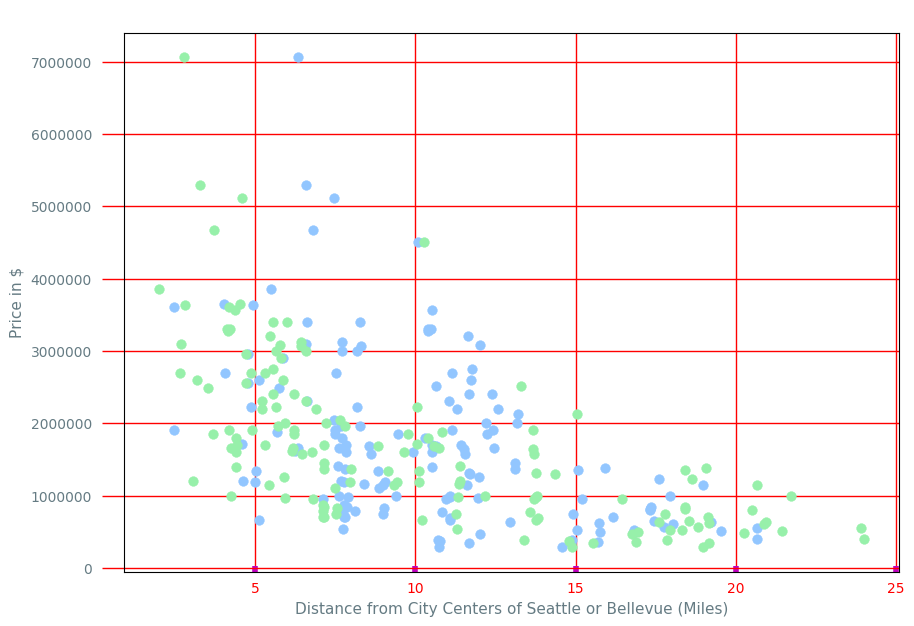

In [555]:
distance = 25
df_city_distance = df_on_waterfront[(df_on_waterfront['distance_seattle_center'] < distance) | (df_on_waterfront['distance_bellevue_center'] < distance)]
distance_seattle = df_city_distance[['distance_seattle_center']]
distance_bellevue = df_city_distance['distance_bellevue_center']
price = df_city_distance['price']

plt.style.use( 'seaborn-v0_8-pastel')

fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(distance_seattle, price, alpha=1)
ax.scatter(distance_bellevue, price, alpha=1)
ax.set_title('Prices vs Distance from City Center', fontsize=14)
ax.set_ylabel('Price in $')
ax.set_xlabel('Distance from City Centers of Seattle or Bellevue (Miles)')

ax.tick_params(right=False, left=True, axis='y', color='r', length=16,
                grid_color='r')
ax.tick_params(axis='x', color='m', length=4, direction='in', width=4,
                labelcolor='r', grid_color='r')
ax.ticklabel_format(style="plain", axis="y")  

plt.show()

In [560]:
df_on_waterfront['price'].describe()


count       146.000
mean    1717214.726
std     1145384.857
min      285000.000
25%      827500.000
50%     1510000.000
75%     2282500.000
max     7060000.000
Name: price, dtype: float64

### It should be Nice & Isolated 

Question:

1. Is it isolated when sqft_lot is big?
2. Is nice a good condition and a good view?
3. Is isolated that the other lots are also big?

In [563]:
df_on_waterfront

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,date,price,house_id,sale_id,distance_seattle_center,distance_bellevue_center
49,822039084,3.000,2.500,2753.000,65005.000,1.000,1.000,2.000,5,9,...,47.404,-122.451,2680.000,72513.000,2015-03-11,1350000.000,822039084,50,15.091,18.429
230,8096000060,2.000,1.750,1450.000,15798.000,2.000,1.000,4.000,3,7,...,47.450,-122.375,2030.000,13193.000,2015-04-13,655000.000,8096000060,231,11.095,13.762
246,2025069065,4.000,2.500,3650.000,8354.000,1.000,1.000,4.000,3,9,...,47.634,-122.072,3120.000,18841.000,2014-09-29,2400000.000,2025069065,247,12.385,6.207
264,2123039032,1.000,0.750,760.000,10079.000,1.000,1.000,4.000,5,5,...,47.468,-122.438,1230.000,14267.000,2014-10-27,369900.000,2123039032,265,10.779,14.795
300,3225069065,4.000,5.000,4550.000,18641.000,1.000,1.000,4.000,3,10,...,47.605,-122.077,4550.000,19508.000,2014-06-24,3080000.000,3225069065,301,12.028,5.772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2025069140,3.000,2.500,2830.000,4334.000,3.000,1.000,4.000,3,10,...,47.632,-122.071,2830.000,38211.000,2015-03-17,1900000.000,2025069140,19969,12.412,6.218
20309,518500480,3.000,3.500,4410.000,10756.000,2.000,1.000,4.000,3,11,...,47.528,-122.205,3550.000,5634.000,2014-08-11,3000000.000,518500480,20310,8.195,5.675
20751,8043700105,4.000,4.000,4360.000,8175.000,2.500,1.000,4.000,3,10,...,47.572,-122.104,2670.000,8525.000,2015-04-17,2300000.000,8043700105,20752,11.050,5.213
21185,518500460,3.000,3.500,3760.000,5634.000,2.000,1.000,4.000,3,11,...,47.529,-122.205,3560.000,5762.000,2014-10-08,2230000.000,518500460,21186,8.186,5.661


condition
1    658000.000
2   2560000.000
3   1802661.875
4   1579260.870
5   1702022.222
Name: price, dtype: float64

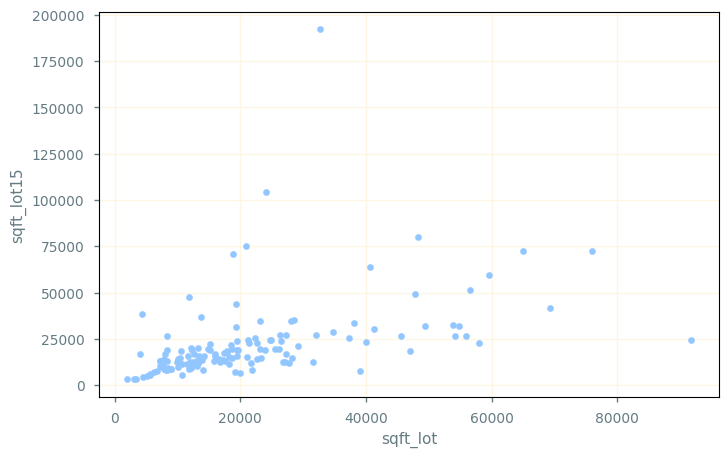

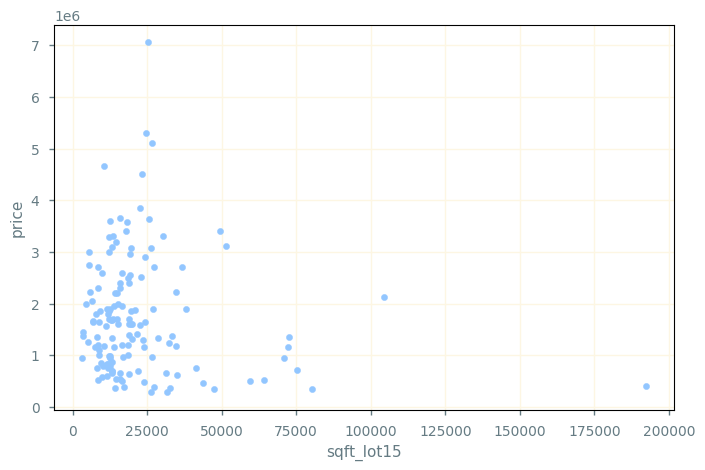

In [606]:
smaller_lot_sizes = df_on_waterfront[df_on_waterfront['sqft_lot'] < 100000]
smaller_lot_sizes.plot(kind='scatter', y='sqft_lot15', x='sqft_lot')
smaller_lot_sizes.plot(kind='scatter', x='sqft_lot15', y='price')

In [607]:
df_view_group = df_on_waterfront.groupby('view')
df_view_group['price'].mean()

view
1.000    635000.000
2.000   2029642.857
3.000   1222785.714
4.000   1735380.894
Name: price, dtype: float64

In [608]:
df_condition_group = df_on_waterfront.groupby('condition')
condition_mean = df_condition_group['price'].mean()

condition
1    658000.000
2   2560000.000
3   1802661.875
4   1579260.870
5   1702022.222
Name: price, dtype: float64

#### So let's define what's nice.

1. We should have some kind of view, so at least 3
2. Condition shouldn't be too bad, as he's a father of at least two, so maybe no time to renovate the house - at least 3
3. The budget is limited, so we need to sort it

In [629]:
quantile_75 = df_on_waterfront['price'].quantile(.75)
print(quantile_75)

quality_houses = df_on_waterfront[
    (df_on_waterfront['view'] > 2) & 
    (df_on_waterfront['condition'] > 2) &
    (df_on_waterfront['grade'] > 9) & 
    ((df_on_waterfront['distance_seattle_center'] < 7) |  
        (df_on_waterfront['distance_bellevue_center'] < 7)) &
     (df_on_waterfront['price'] <  quantile_75)]

title = "Properties in Seattle"

lats = quality_houses.lat
lons = quality_houses.long

fig = px.scatter_mapbox(quality_houses, 
                        lat=lats, 
                        lon=lons,
                        hover_data=["price"], 
                        size='price',
                        color='price',
                        color_continuous_scale=px.colors.carto.Agsunset_r, 
                        zoom=9.5,
                        title=title
                        )

fig.update_geos(fitbounds="locations")
fig.update_layout(height=700, width=700)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50})

fig.show()

quality_houses

2282500.0


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,date,price,house_id,sale_id,distance_seattle_center,distance_bellevue_center
2177,3343301920,3.000,2.750,2690.000,8890.000,2.000,1.000,4.000,4,10,...,47.549,-122.197,2940.000,8890.000,2015-03-02,1650000.000,3343301920,2178,7.633,4.265
4214,1025039086,3.000,2.500,3280.000,29111.000,2.000,1.000,3.000,3,11,...,47.670,-122.416,3530.000,21074.000,2014-09-16,1880000.000,1025039086,4215,5.696,10.835
4216,3342104046,4.000,2.250,2890.000,18226.000,3.000,1.000,4.000,3,10,...,47.517,-122.209,2870.000,11151.000,2014-07-08,1570000.000,3342104046,4217,8.616,6.470
4404,5154200015,3.000,3.000,2490.000,27702.000,2.000,1.000,4.000,3,10,...,47.560,-122.403,2580.000,12119.000,2015-04-14,1710000.000,5154200015,4405,4.603,10.061
5661,9253900417,3.000,2.500,2850.000,19593.000,1.500,1.000,4.000,3,10,...,47.589,-122.111,2850.000,18782.000,2015-01-28,1600000.000,9253900417,5662,10.523,4.422
6227,2024069008,5.000,4.750,5990.000,10450.000,2.000,1.000,4.000,3,11,...,47.555,-122.077,3330.000,14810.000,2014-06-19,2200000.000,2024069008,6228,12.569,6.903
7879,3024059014,4.000,2.250,3020.000,11489.000,1.500,1.000,3.000,5,10,...,47.539,-122.210,3890.000,11489.000,2015-03-25,1900000.000,3024059014,7880,7.513,4.916
8775,3343302110,3.000,3.000,2790.000,13295.000,2.000,1.000,4.000,4,10,...,47.547,-122.197,3140.000,11949.000,2015-03-06,1800000.000,3343302110,8776,7.712,4.410
12601,3225069241,3.000,2.500,3490.000,21064.000,1.000,1.000,4.000,3,10,...,47.609,-122.073,1780.000,15244.000,2015-04-22,2000000.000,3225069241,12602,12.213,5.948
14605,7936500109,3.000,3.000,3620.000,28064.000,2.000,1.000,4.000,5,10,...,47.552,-122.398,2550.000,34713.000,2014-07-25,2230000.000,7936500109,14606,4.875,10.053
